## **EX 1 - Learning the data :)**

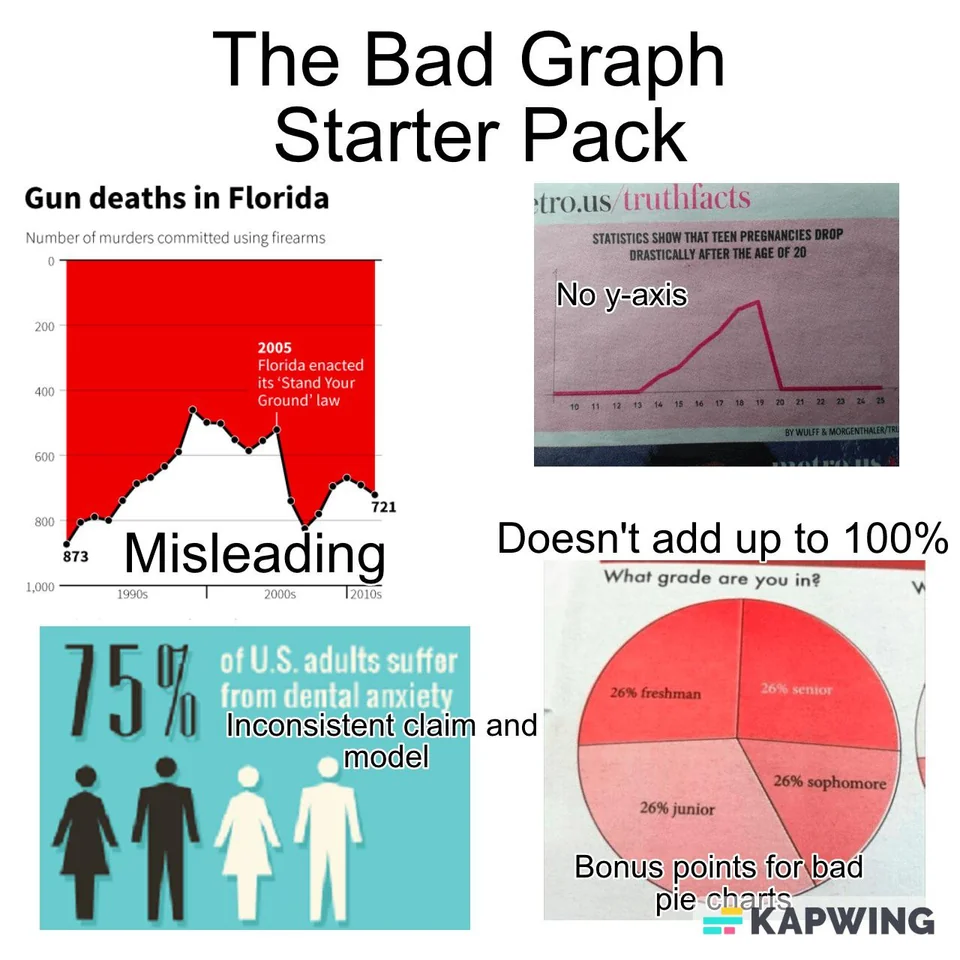   
Link: https://www.reddit.com/r/mathmemes/comments/12ec0u9/

### These are important imports

In [1]:
!pip install -r req.txt


[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: C:\Users\liri\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from random import choice, sample
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from time import sleep

In [3]:
sb.set(color_codes=True, rc={'figure.figsize': (5, 5)})
COLUMNS_IS_CATEGORY = "is_software	is_web	is_mobile	is_enterprise	is_advertising	is_gamesvideo	is_ecommerce	is_biotech	is_consulting	is_othercategory".split('\t')
COLUMNS_IN_STATE = "in_CA	in_NY	in_MA	in_TX	in_otherstate".split('\t')
ROUNDS = "roundA	roundB	roundC	roundD".split('\t')

### 1) Show the data information, e.g., types of attributes, the attributes values etc.

#### Reading the CSV file:

In [4]:
data_frame = pd.read_csv("./startup_dataset.csv")

#### Data information and examples of our data:

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   738 non-null    object 
 1   state_code           738 non-null    object 
 2   latitude             738 non-null    float64
 3   longitude            738 non-null    float64
 4   zip_code             738 non-null    object 
 5   city                 738 non-null    object 
 6   name                 738 non-null    object 
 7   foundation_date      738 non-null    object 
 8   first_funding_date   738 non-null    object 
 9   last_funding_date    738 non-null    object 
 10  first_funding_age    738 non-null    float64
 11  last_funding_age     738 non-null    float64
 12  first_milestone_age  609 non-null    float64
 13  last_milestone_age   609 non-null    float64
 14  connections          738 non-null    int64  
 15  funding_rounds       738 non-null    int

In [6]:
data_frame.head()

,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,is_biotech,is_consulting,is_othercategory,roundA,roundB,roundC,roundD,avg_group_size,in_Top500,Target
0,c:6669,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,01/01/2007,04/01/2009,01/01/2010,...,0,0,1,0,0,0,0,1.0000,0,acquired
1,c:16283,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,01/01/2000,2/14/2005,12/28/2009,...,0,0,0,0,1,1,1,4.7500,1,acquired
2,c:65620,CA,32.901049,-117.192656,92121,San Diego,Plixi,3/18/2009,3/30/2010,3/30/2010,...,0,0,0,1,0,0,0,4.0000,1,acquired
3,c:42668,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,01/01/2002,2/17/2005,4/25/2007,...,0,0,0,0,1,1,1,3.3333,1,acquired
4,c:65806,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,08/01/2010,08/01/2010,04/01/2012,...,0,0,0,0,0,0,0,1.0000,1,closed


In [7]:
data_frame.describe(include='all')

,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,is_biotech,is_consulting,is_othercategory,roundA,roundB,roundC,roundD,avg_group_size,in_Top500,Target
count,738,738,738.000000,738.000000,738,738,738,738,738,738,...,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738
unique,738,32,NaN,NaN,327,194,738,186,487,578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,c:6669,CA,NaN,NaN,94107,San Francisco,Bandsintown,01/01/2002,01/01/2007,01/01/2008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acquired
freq,1,376,NaN,NaN,24,100,1,47,14,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470
mean,NaN,NaN,38.558655,-102.814267,NaN,NaN,NaN,NaN,NaN,NaN,...,0.039295,0.002710,0.310298,0.513550,0.397019,0.231707,0.105691,2.795865,0.814363,NaN
std,NaN,NaN,3.669119,22.456789,NaN,NaN,NaN,NaN,NaN,NaN,...,0.194429,0.052023,0.462929,0.500155,0.489612,0.422209,0.307650,1.828125,0.389077,NaN
min,NaN,NaN,26.052461,-122.756956,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN
25%,NaN,NaN,37.391580,-122.192169,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,NaN
50%,NaN,NaN,37.779281,-118.287233,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.450000,1.000000,NaN
75%,NaN,NaN,40.730646,-76.850588,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.666700,1.000000,NaN


### 2) Show the data statistics, e.g.,  distribution, skewness, median and more.

#### Statistics of our data (some methods)

In [8]:
def print_stats(df: pd.DataFrame) -> None:
    for f in [pd.DataFrame.mean, pd.DataFrame.skew, pd.DataFrame.median, pd.DataFrame.std]:
        print(f"{f.__name__} = {f(df)}")
    print(f"mode = {df.mode()[0]}")

def show_distribution_numeric(df):
    colors = ['red', 'green', 'blue', 'yellow', 'black', 'purple', 'orange', 'pink', 'brown', 'grey']  # cool colors!
    binary_data = [col for col in df.columns if df[col].nunique() == 2] # binary data
    
    # prepare subplots
    chosen_colors = (x for x in sample(colors, 9))
    fig_non_binary, ax_non_binary = plt.subplots(3, 3, figsize=(16, 16))
    fig_non_binary.suptitle('Non-binary data histograms')
    
    # indices for the place of each subplot
    idx_non_binary = 0

    for col in df.columns:  # iterate over all columns
        # if the column is numeric and not the location or cat-code, plot it
        if (df[col].dtype == 'int64' or df[col].dtype == 'float64') and col != 'longitude' and col != 'latitude' and 'code' not in col:
            if col not in binary_data:  # if the column is not binary - plot it as a histogram
                x, y = divmod(idx_non_binary, 3)
                is_log_scale = col == 'total_funding'
                plot_title = col + ' - log scale' if is_log_scale else ''
                sb.histplot(df[col], color=next(chosen_colors), ax=ax_non_binary[x, y], log_scale=is_log_scale)
                ax_non_binary[x, y].set_title(plot_title)
                idx_non_binary += 1
    
    # show the other binary data in pie charts
    binary_labels = ['No', 'Yes']
    fig_binary, (ax_binary_1, ax_binary_2, ax_binary_3) = plt.subplots(1, 3, figsize=(25, 7))
    fig_binary.suptitle("Binary data")

    ax_binary_1.pie(df[COLUMNS_IN_STATE].sum(axis=0).values, labels=[label[3:] for label in COLUMNS_IN_STATE], autopct='%1.1f%%')
    ax_binary_1.set_title("State Codes")
    
    ax_binary_2.pie(df[COLUMNS_IS_CATEGORY].sum(axis=0).values, labels=[label[3:] for label in COLUMNS_IS_CATEGORY], autopct='%1.1f%%')
    ax_binary_2.set_title("Category")
    
    labels = binary_labels if df['in_Top500'].sum(axis=0) < df.shape[0] / 2 else binary_labels[::-1]
    ax_binary_3.pie(df['in_Top500'].value_counts(), labels=labels, autopct='%1.1f%%')
    ax_binary_3.set_title("in_Top500?")

    # show the rounds binary data in pie charts
    fig_rounds, ax_rounds = plt.subplots(2, 2, figsize=(16, 16))
    fig_rounds.suptitle("Rounds")

    for idx, col in enumerate(ROUNDS):
        x, y = divmod(idx, 2)
        labels = binary_labels if df[col].sum(axis=0) < df.shape[0] / 2 else binary_labels[::-1]
        ax_rounds[x, y].pie(df[col].value_counts(), labels=labels, autopct='%1.1f%%')
        ax_rounds[x, y].set_title(f"got to {col}?")
    
    plt.show()     

#### Distribution and statistics of our nominal data

Text(0.5, 1.0, 'Count of state codes')

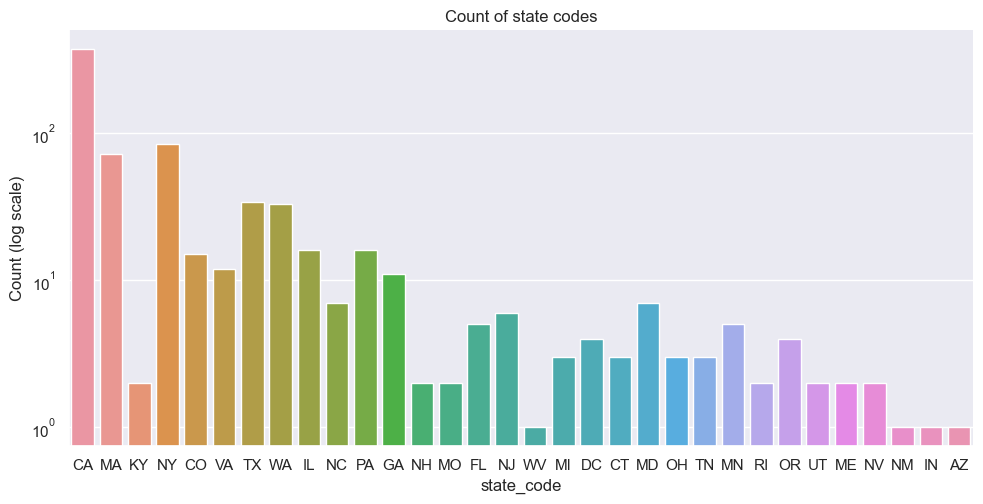

In [9]:
sb.catplot(x='state_code', kind='count', data=data_frame, height=5, aspect=2)
plt.yscale('log')  # printing in LOGARITHMIC SCALE
plt.ylabel('Count (log scale)')
plt.title('Count of state codes')

In [10]:
data_frame['state_code_codes'] = data_frame['state_code'].map({state: i for i, state in enumerate(data_frame['state_code'].unique())})
print_stats(data_frame['state_code_codes'])

# 0 in the MODE means CA, 1 means MA and etc.

mean = 3.4525745257452574
skew = 2.3270934893679924
median = 0.0
std = 5.8660812505448074
mode = 0


Text(0.5, 1.0, 'Count of catagories')

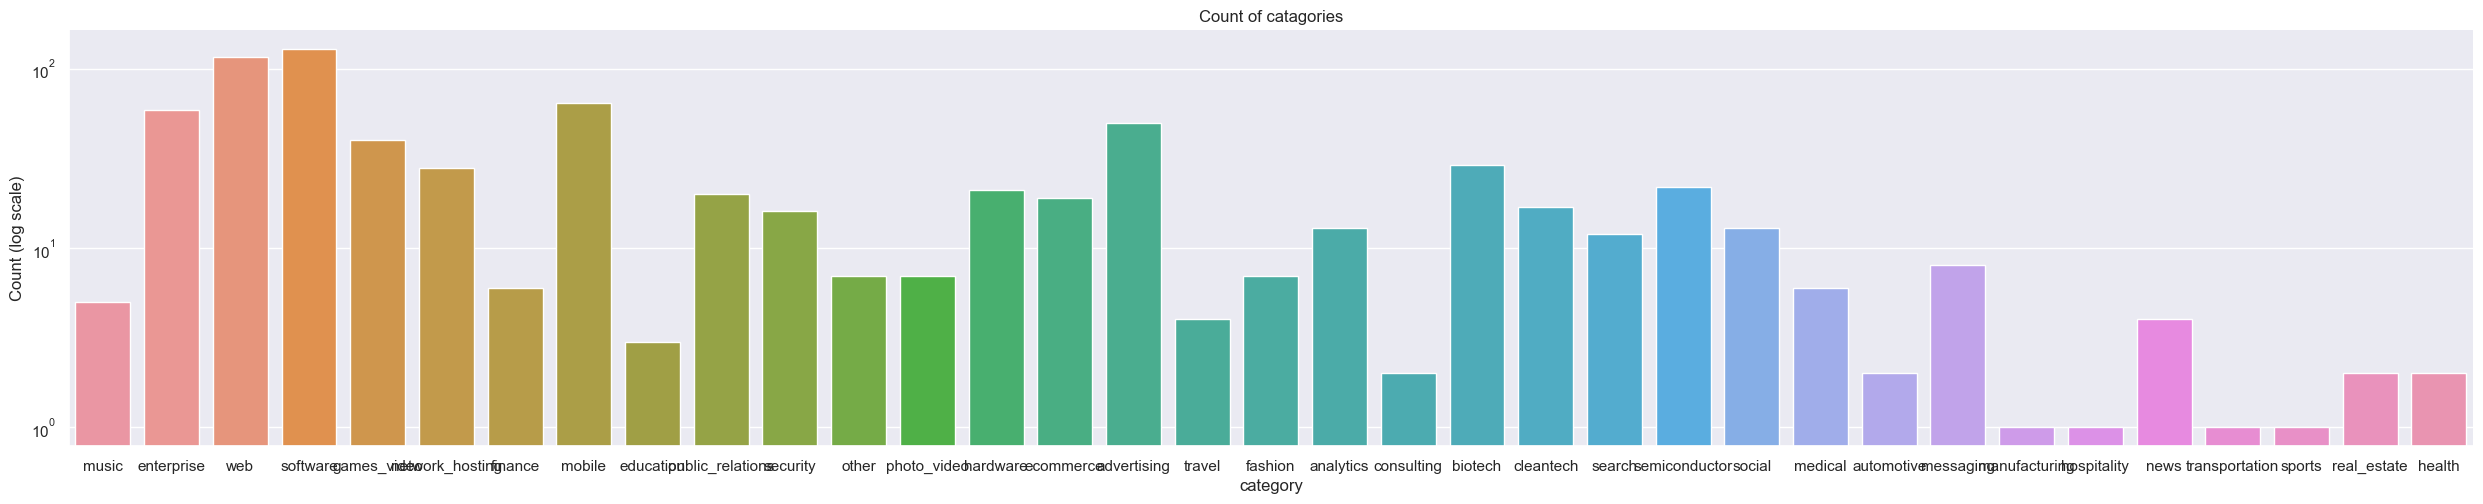

In [11]:
sb.catplot(x='category', kind='count', data=data_frame, height=5, aspect=5)
plt.yscale('log')  # printing in LOGARITHMIC SCALE
plt.ylabel('Count (log scale)')
plt.title('Count of catagories')

In [12]:
data_frame['category_codes'] = data_frame['category'].map({state: i for i, state in enumerate(data_frame['category'].unique())})
print_stats(data_frame['category_codes'])

# 0 in the MODE means music, 1 means Biotech and enterprise.

mean = 8.86720867208672
skew = 0.9515823306734885
median = 5.0
std = 7.967793588402462
mode = 3


Text(0.5, 1.0, 'Count of target')

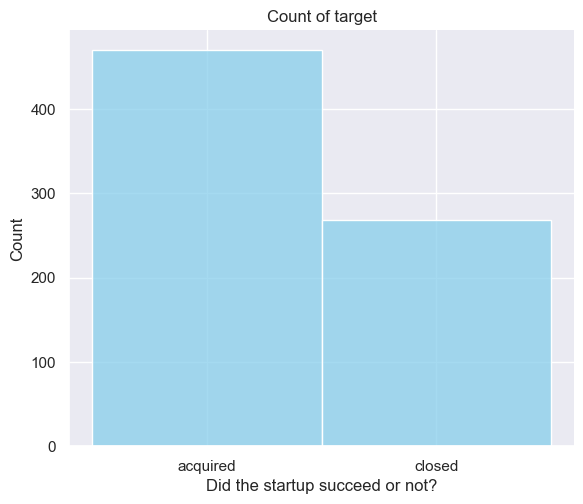

In [13]:
sb.displot(x='Target', kind='hist', data=data_frame, height=5, aspect=1.2, color='skyblue')
plt.xlabel('Did the startup succeed or not?')
plt.ylabel('Count')
plt.title('Count of target')

In [14]:
data_frame['target_codes'] = data_frame["Target"].map({'acquired': 1, 'closed': 0})
print_stats(data_frame["target_codes"])

# 1 in the MEAN means ACQUIRED

mean = 0.6368563685636857
skew = -0.5703207252379181
median = 1.0
std = 0.4812318921509238
mode = 1


In [15]:
data_frame['city_codes'] = data_frame['city'].map({state: i for i, state in enumerate(data_frame['city'].unique())})
print_stats(data_frame['city_codes'])

# 0 in the MODE means San Francisco, 1 means Durham and etc.

mean = 44.74525745257453
skew = 1.358309627686365
median = 25.0
std = 49.389682292581334
mode = 3


#### Distribution and statistics of the numeric data

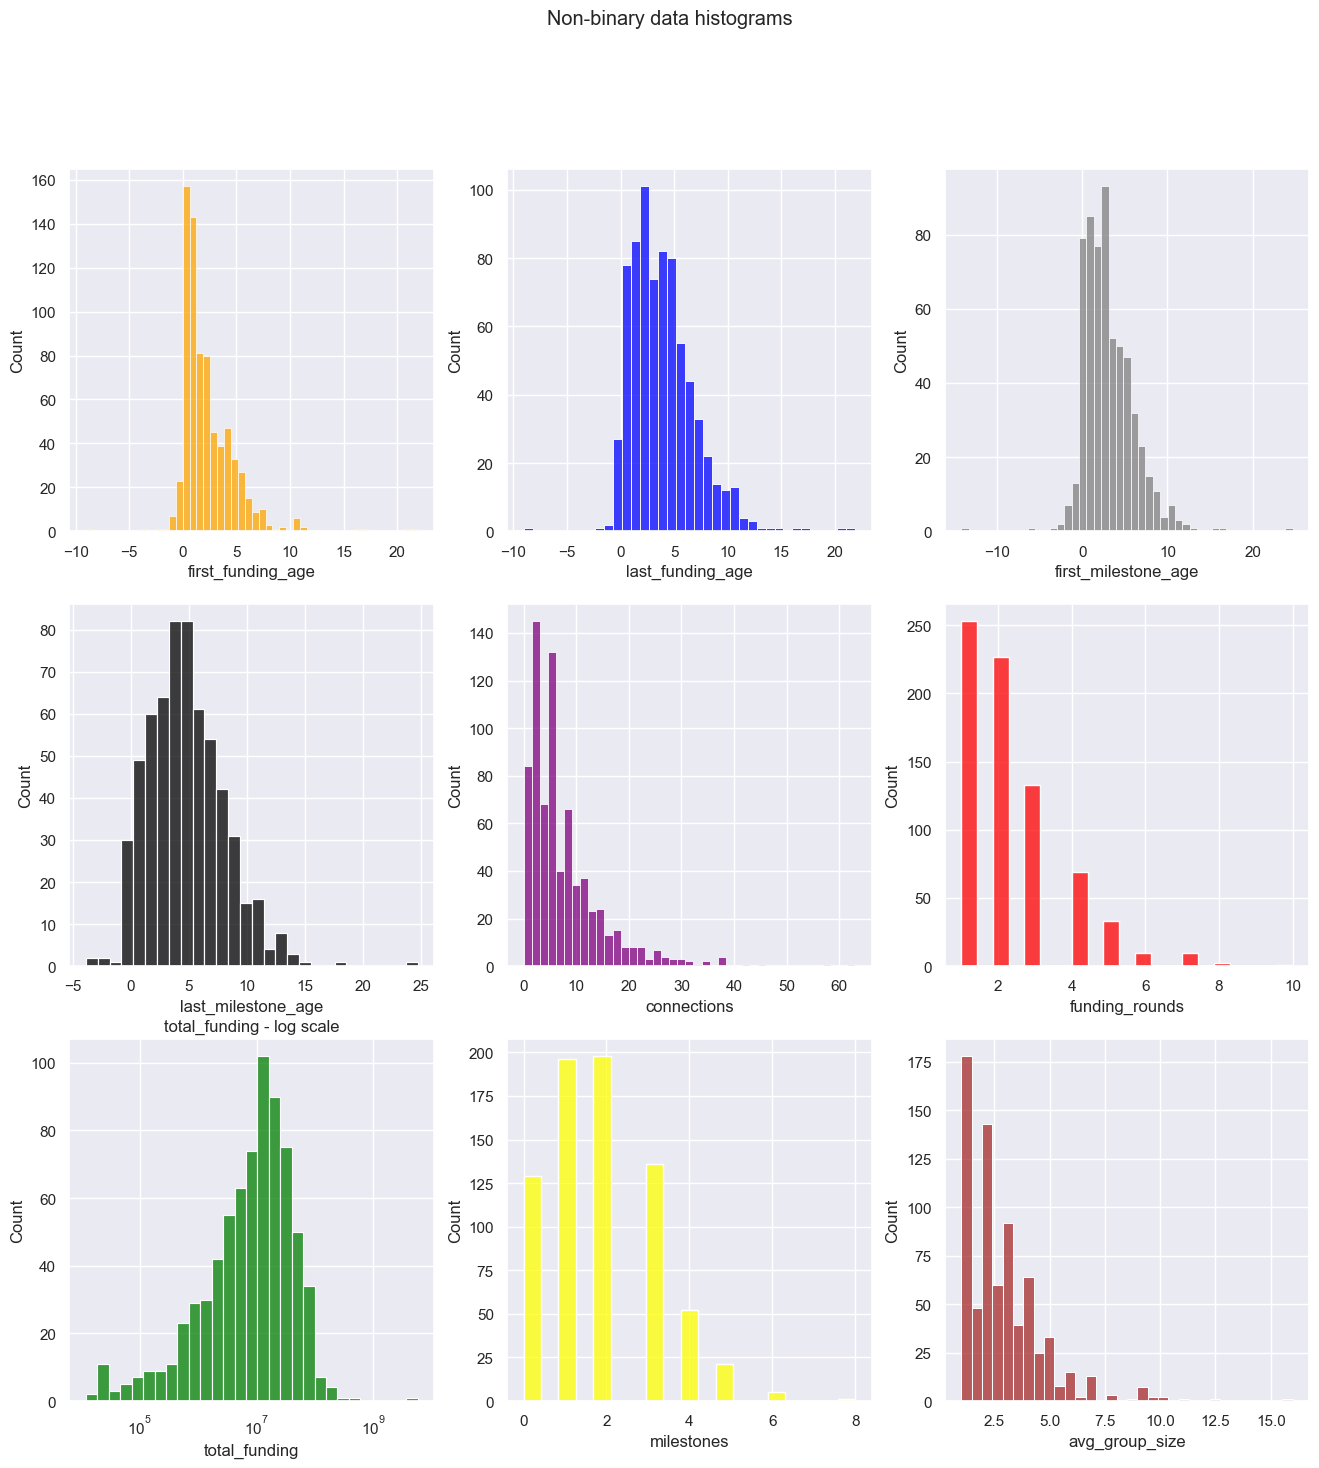

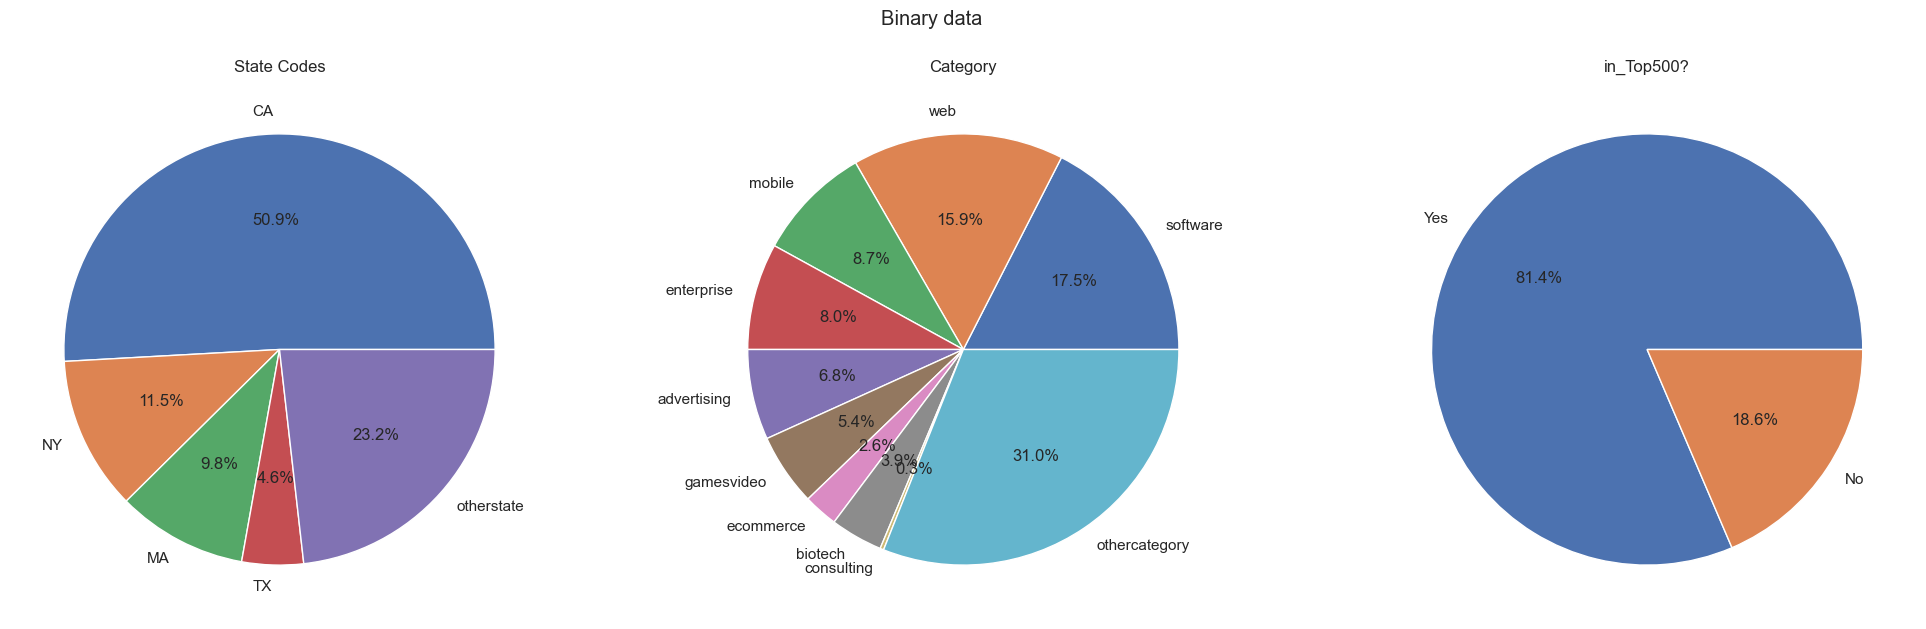

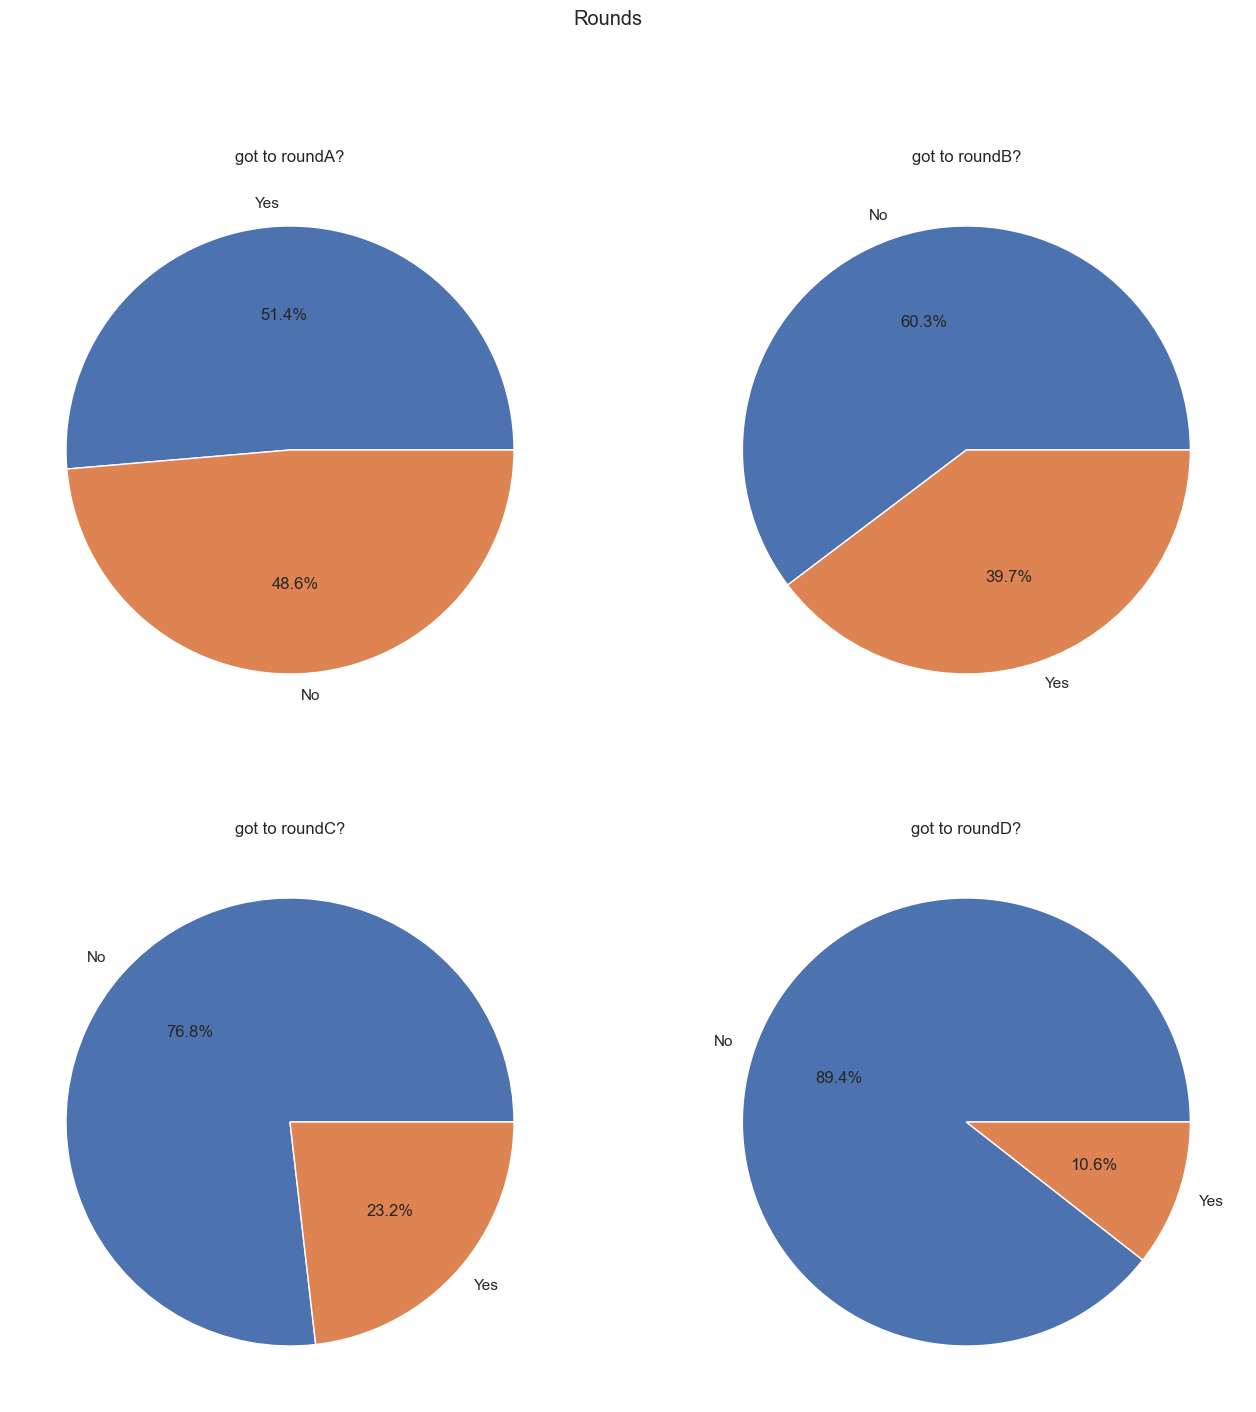

In [16]:
show_distribution_numeric(data_frame)

In [17]:
for col in data_frame.columns:
    if (data_frame[col].dtype == 'int64' or data_frame[col].dtype == 'float64') and col != 'longitude' and col != 'latitude' and 'code' not in col:
        print(f"Stats for {col}:")
        print_stats(data_frame[col])  # printing stats for each column :)
        print()

Stats for first_funding_age:
mean = 2.2326372628726285
skew = 2.2906042012119334
median = 1.50135
std = 2.5418426713393605
mode = 0.0

Stats for last_funding_age:
mean = 3.9255327913279134
skew = 1.1832429582279003
median = 3.4945000000000004
std = 3.0144426182293844
mode = 0.0

Stats for first_milestone_age:
mean = 3.0942821018062396
skew = 1.072755262123283
median = 2.6466
std = 3.004925939300737
mode = 0.0

Stats for last_milestone_age:
mean = 4.803811658456485
skew = 0.8561592404765423
median = 4.4877
std = 3.2719659799966294
mode = 4.0027

Stats for connections:
mean = 7.7046070460704605
skew = 2.441283838479683
median = 5.0
std = 7.4553036621432875
mode = 5

Stats for funding_rounds:
mean = 2.307588075880759
skew = 1.4074874166071891
median = 2.0
std = 1.3954653770048755
mode = 1

Stats for total_funding:
mean = 27381800.120596208
skew = 26.187512350847182
median = 10000000.0
std = 211732206.69525778
mode = 5000000

Stats for milestones:
mean = 1.8306233062330624
skew = 0.6168880

### 3) Show  and  explain  attributes  correlations. 

In [18]:
df_correlations = data_frame.corr(numeric_only=True)
df_correlations

,latitude,longitude,first_funding_age,last_funding_age,first_milestone_age,last_milestone_age,connections,funding_rounds,total_funding,milestones,...,roundA,roundB,roundC,roundD,avg_group_size,in_Top500,state_code_codes,category_codes,target_codes,city_codes
latitude,1.000000,0.362387,-0.057213,-0.061956,-0.076824,-0.062787,-0.050513,-0.006982,-0.085235,0.002742,...,-0.035337,-0.025101,-0.066926,-0.045475,-0.020249,0.048904,0.206245,-0.046982,0.037893,0.123285
longitude,0.362387,1.000000,-0.002254,-0.005137,-0.053508,-0.085123,-0.073691,0.015995,0.020158,-0.008864,...,-0.064639,-0.082009,-0.061214,-0.064926,-0.035647,-0.094226,0.405969,0.024865,-0.022468,0.285585
first_funding_age,-0.057213,-0.002254,1.000000,0.766039,0.594749,0.483144,-0.183358,-0.160621,0.046359,-0.280827,...,-0.281353,-0.044321,0.026658,0.100231,0.118929,0.050020,0.039446,0.061401,-0.059797,0.131866
last_funding_age,-0.061956,-0.005137,0.766039,1.000000,0.688097,0.637672,0.077883,0.373669,0.116076,-0.097969,...,-0.104159,0.275057,0.300999,0.316371,0.140070,0.191046,-0.020978,0.074132,0.076505,0.142889
first_milestone_age,-0.076824,-0.053508,0.594749,0.688097,1.000000,0.779016,0.255279,0.181870,0.062544,-0.030350,...,0.014750,0.210068,0.198835,0.258259,0.063160,0.167591,-0.048946,-0.051223,0.175999,0.061263
last_milestone_age,-0.062787,-0.085123,0.483144,0.637672,0.779016,1.000000,0.366169,0.250927,0.094482,0.358309,...,0.095117,0.278399,0.273729,0.256766,0.092565,0.211758,-0.077549,-0.090337,0.285837,0.019692
connections,-0.050513,-0.073691,-0.183358,0.077883,0.255279,0.366169,1.000000,0.361143,0.096143,0.528465,...,0.313651,0.296837,0.261875,0.233105,0.110219,0.230391,-0.137671,-0.039766,0.354304,-0.113336
funding_rounds,-0.006982,0.015995,-0.160621,0.373669,0.181870,0.250927,0.361143,1.000000,0.114936,0.247676,...,0.241887,0.456517,0.431580,0.350841,0.057083,0.255254,-0.081839,-0.014382,0.190803,-0.011520
total_funding,-0.085235,0.020158,0.046359,0.116076,0.062544,0.094482,0.096143,0.114936,1.000000,0.014881,...,-0.029167,0.011717,0.035971,0.039217,0.050530,0.047372,0.019727,0.006470,0.040964,0.002306
milestones,0.002742,-0.008864,-0.280827,-0.097969,-0.030350,0.358309,0.528465,0.247676,0.014881,1.000000,...,0.326341,0.204771,0.092869,0.033402,0.039267,0.180523,-0.150524,-0.142795,0.335855,-0.171659


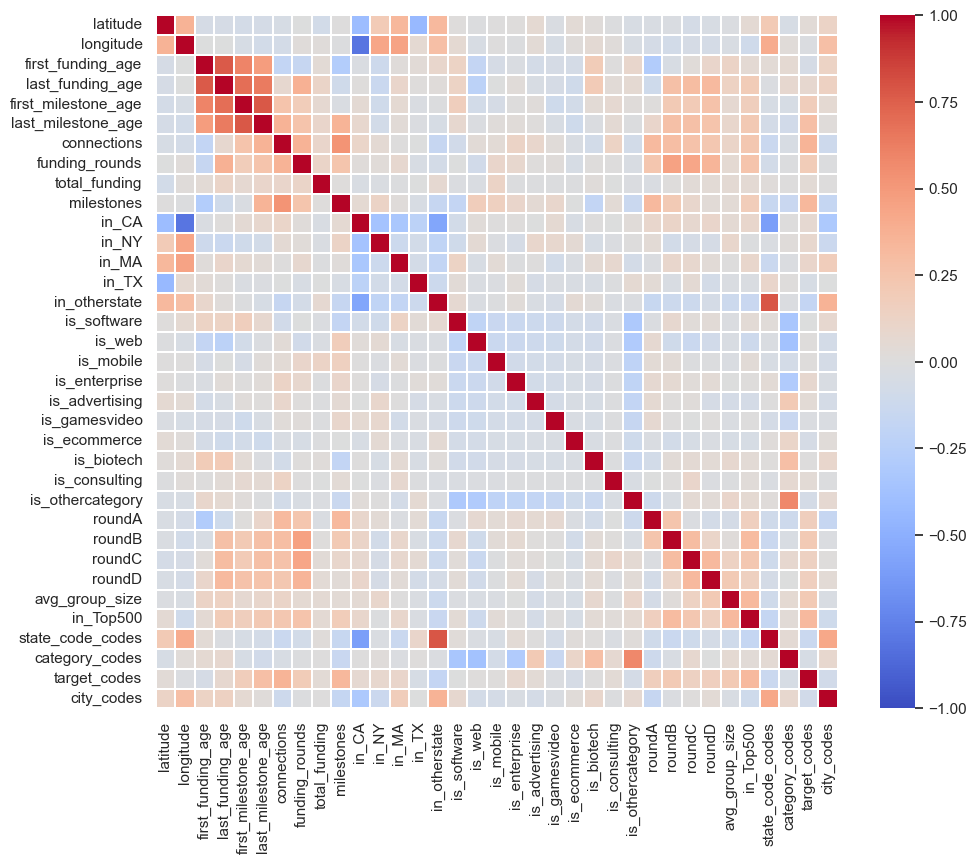

In [19]:
f, ax = plt.subplots(figsize=(11, 9))
ax = sb.heatmap(df_correlations, annot=False, vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=0.01, linecolor='white')

### 4) Show  and  explain  visualizations  that  present  interesting  insights  from  the  data,  e.g.,  identify relations,  trends,  the  effect  of  an  attribute  on  the target  variable  etc.

#### Relationships 

According to the correlation matrix, we can see that the most correlated attributes are

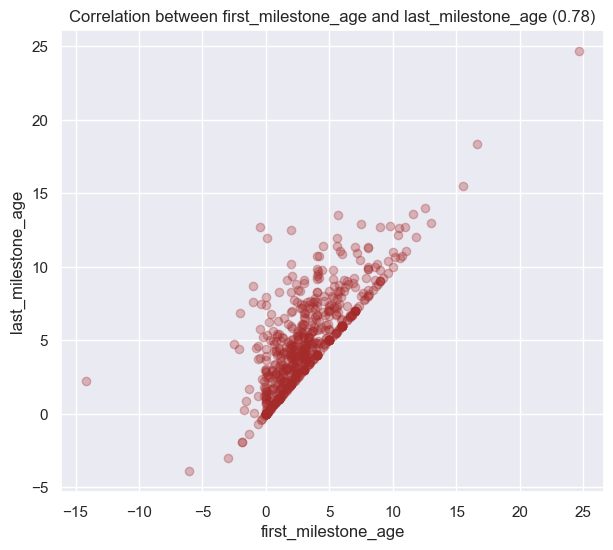

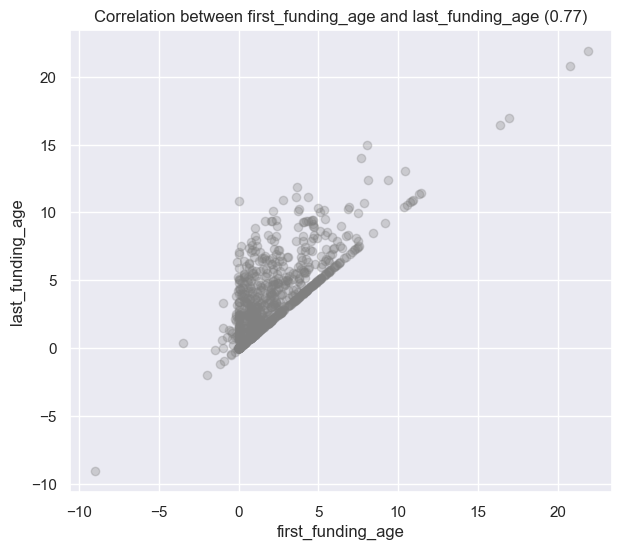

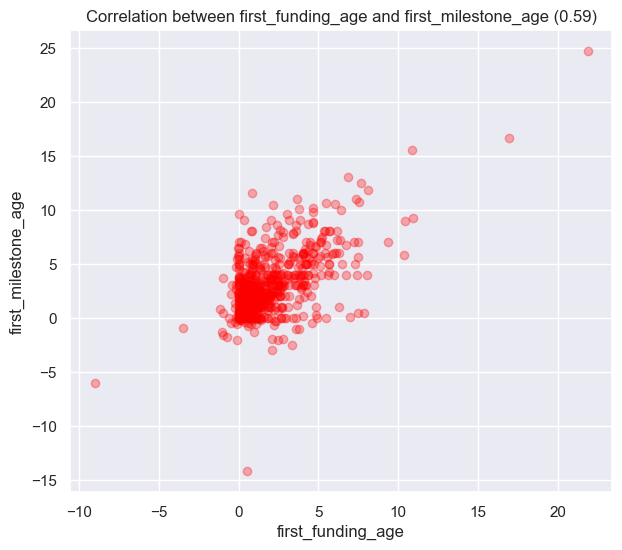

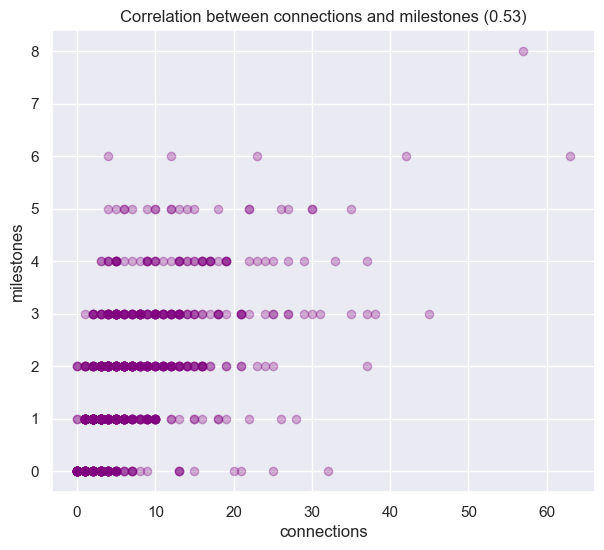

In [20]:
def show_relations(col1, col2, corr):
    colors = ['red', 'green', 'blue', 'black', 'purple', 'orange', 'brown', 'grey']  # cool colors!
    plt.figure(figsize=(7, 6))
    plt.scatter(data_frame[col1], data_frame[col2], color=choice(colors), alpha=0.3)
    plt.title(f'Correlation between {col1} and {col2} ({corr})')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

relations = [('first_milestone_age', 'last_milestone_age', 0.78), ('first_funding_age', 'last_funding_age', 0.77), ('first_funding_age', 'first_milestone_age', 0.59), ('connections', 'milestones', 0.53)]

for relation in relations:
    show_relations(relation[0], relation[1], relation[2])

Let's also examine other relations such as the relation between the country and if the startup is in the top 500 or not, and if the startup was acquired or not.

In [21]:
data_frame.loc[data_frame['in_CA'] == 1, 'country'] = 'CA'
data_frame.loc[data_frame['in_NY'] == 1, 'country'] = 'NY'
data_frame.loc[data_frame['in_MA'] == 1, 'country'] = 'MA'
data_frame.loc[data_frame['in_TX'] == 1, 'country'] = 'TX'
data_frame.loc[data_frame['in_otherstate'] == 1, 'country'] = 'other-state'

In [22]:
data_frame.loc[data_frame['in_Top500'] == 1, 'in_Top500_str'] = 'Yes'
data_frame.loc[data_frame['in_Top500'] == 0, 'in_Top500_str'] = 'No'

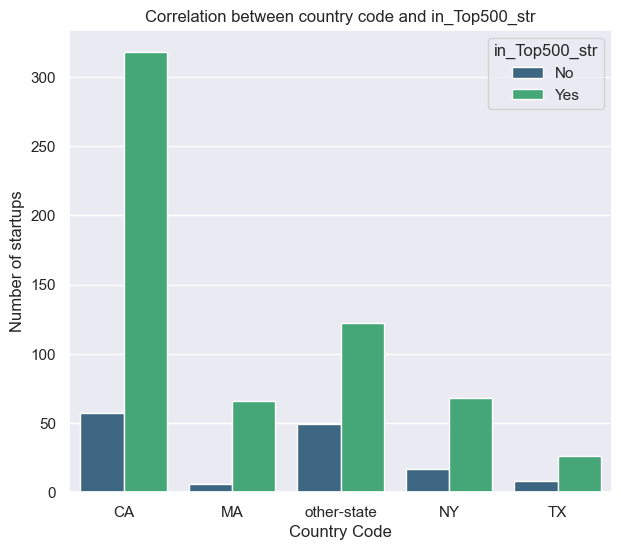

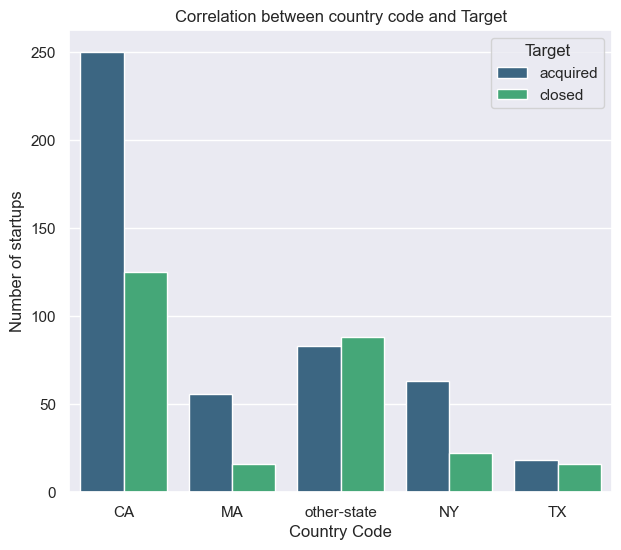

In [23]:
cols = ['in_Top500_str', 'Target']

for c in cols:
    plt.figure(figsize=(7, 6))
    sb.countplot(x='country', hue=c, data=data_frame, palette='viridis')
    plt.title(f'Correlation between country code and {c}')
    plt.xlabel('Country Code')
    plt.ylabel('Number of startups')
    # plt.legend(title=c, labels=['No', 'Yes'])
    plt.show()

We can see from this histogram that startups in CA, NY, MA, TX has more potential to be in the top 500 than other states.   
We can also see that the country of the startup does affect the chance of being acquired! If the startup is in CA, MA, NY or TX, it has a higher chance of being acquired than other countries.

Now we can see according to the correlation matrix that being in the top 500 is somewhat correlated with the target variable. Let's examine this relationship more closely

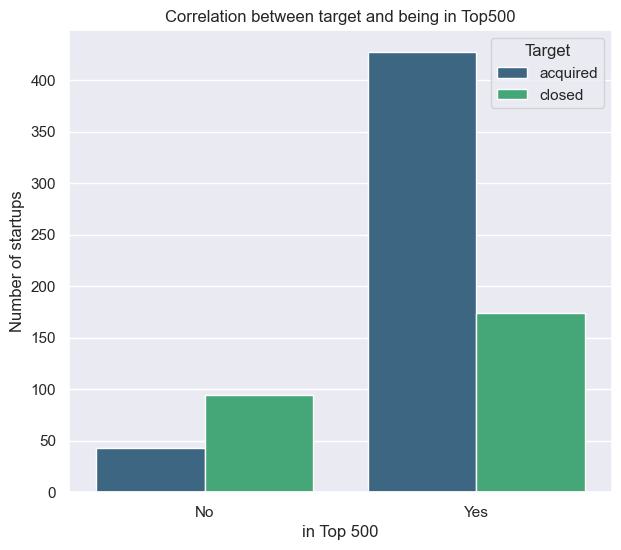

In [24]:
plt.figure(figsize=(7, 6))
sb.countplot(x='in_Top500_str', hue='Target', data=data_frame, palette='viridis')
plt.title('Correlation between target and being in Top500')
plt.xlabel('in Top 500')
plt.ylabel('Number of startups')
# plt.legend(title='Target', labels=['No', 'Yes'])
plt.show()

We can see the relationship between the success of the startup and being in the top 500 - when the startup in the top 500 it has more probability to succeed, and in the other hand, when it didn't get to the top 500 it has more probability to fail.

Now let's see the relationship between the first funding date and the first milestone age of the startup (according to the correlation matrix, their correlation is 0.6)

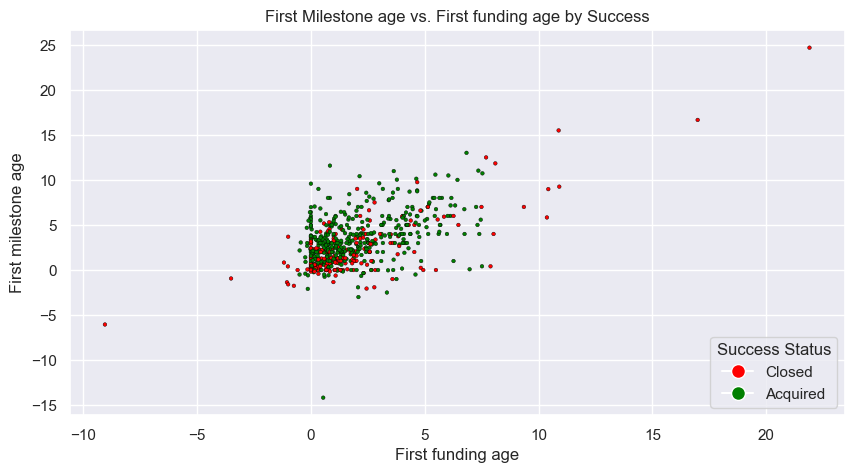

In [25]:
colordict = {'closed': 'red', 'acquired': 'green'}
plt.figure(figsize=(10, 5))
scatter = plt.scatter(data_frame['first_funding_age'], data_frame['first_milestone_age'], s=7, c=data_frame['Target'].map(colordict),  edgecolors='black', linewidths=0.3)
plt.title('First Milestone age vs. First funding age by Success')
plt.xlabel('First funding age')
plt.ylabel('First milestone age')
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Closed',
                              markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Acquired',
                              markerfacecolor='green', markersize=10)]

plt.legend(handles=legend_elements, title='Success Status', loc='lower right')
plt.show()

We can see that the first milestone usually happens close to the first funding (because we got a relation close to linear). We can also see that company that has older first milestone age tends to not succeed.

We can do the same for the last funding age and the last milestone age (because their correlation is 0.64)

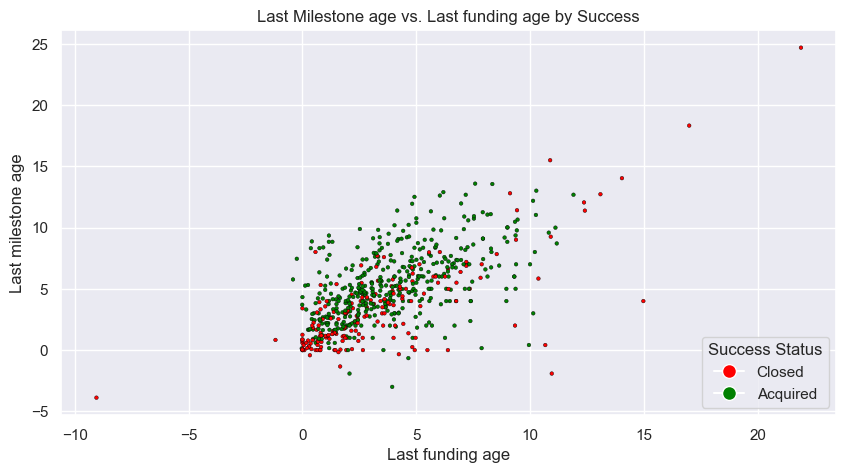

In [26]:
colordict = {'closed': 'red', 'acquired': 'green'}
plt.figure(figsize=(10, 5))
scatter = plt.scatter(data_frame['last_funding_age'], data_frame['last_milestone_age'], s=7, c=data_frame['Target'].map(colordict),  edgecolors='black', linewidths=0.3)
plt.title('Last Milestone age vs. Last funding age by Success')
plt.xlabel('Last funding age')
plt.ylabel('Last milestone age')
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Closed',
                              markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Acquired',
                              markerfacecolor='green', markersize=10)]

plt.legend(handles=legend_elements, title='Success Status', loc='lower right')
plt.show()

### 5) Data cleaning - check for each one of the problems and take care of them properly, e.g., missing values,  inconsistent  etc. 

### Spring cleaning!

#### Inconsistent values

First we can check if the state_code is consistent with the in_(state_code) values in the data_frame, changing the in_(state_code) according to the state_code.

In [27]:
def check_binary_inconsistency(columns, label):
    association_word = columns[0][:2]
    for index in data_frame[label].index:

        # x = data_frame.loc[index, columns].values#.sum()# == 1
        # x = next((col for (col, val) in zip(columns, x) if val==1)).strip("in_")
        category_code = data_frame.loc[index, label].replace('_', '')
        good_code = f"{association_word}_{category_code}" if f"{association_word}_{category_code}" in columns else columns[-1]
    
        if data_frame.loc[index, good_code] == 1:
            if data_frame.loc[index, columns].values.sum() == 1:  # we have only one 1 :)
                continue
            else:  # we have more than one 1 :(
                data_frame.loc[index, columns] = [0]*len(columns)
                data_frame.loc[index, good_code] = 1  # save the good one

        else:  # we don't have a one in the good column
            print("wrong values fixing now...", end=" ")
            right_value = [0]*len(columns)
            right_value[columns.index(good_code)] = 1
            data_frame.loc[index, columns] = right_value
            sleep(0.5)
            print("done.")
    
    print("All good! No more inconsistency.")

In [28]:
check_binary_inconsistency(COLUMNS_IN_STATE, "state_code")

wrong values fixing now... done.
All good! No more inconsistency.


As we stated before, we had one inconsistent value in the state_code column (we observed it thanks to the country column we added), so we changed it to the correct value.

Secondly, we can check if the category is consistent with the is_(category) values in the data_frame, changing the is_(category) according to the category.

In [29]:
check_binary_inconsistency(COLUMNS_IS_CATEGORY, "category")

All good! No more inconsistency.


We can also check the cities for inconsistency.

In [30]:
x = np.sort(data_frame["city"].unique())
print("\n".join(x))

Addison
Alameda
Albuquerque
Aliso Viejo
Allentown
Alpharetta
Andover
Annapolis
Arlington
Atlanta
Austin
Bala Cynwyd
Bedford
Bellevue
Belmont
Berkeley
Berwyn
Bethesda
Bethlehem
Beverly Hills
Billerica
Bingham Farms
Bloomfield
Boston
Bothell
Boulder
Boxborough
Brisbane
Brooklyn
Broomfield
Burlingame
Burlington
Calabasas
Cambridge
Campbell
Canton
Carlsbad
Carpinteria
Centennial
Champaign
Chantilly
Charlottesville
Chevy Chase
Chicago
Cincinnati
College Park
Columbia
Conshohocken
Cupertino
Dallas
Dedham
Denver
Dulles
Duluth
Durham
El Segundo
Emeryville
Englewood
Evanston
Farmington
Foster City
Framingham
Frederick
Freedom
Fremont
Glendale
Golden Valley
Greenwood Village
Hartford
Henderson
Herndon
Hillsborough
Hollywood
Indianapolis
Irvine
Itasca
Jersey City
Kansas City
Kearneysville
Kirkland
Lake Oswego
Larkspur
Las Vegas
Lawrenceville
Lexington
Lindon
Littleton
Long Island City
Longmont
Los Altos
Los Angeles
Los Gatos
Louisville
Loveland
Lowell
Manchester
Marlborough
Maynard
McLean
Memphis

We found some duplicates in the data (and typos :P), so we'll merge them into the same city.

In [31]:
inconsistency_cities = {'New York City': "NYC.NY.New York", 'Atlanta': 'NW Atlanta',
'Hollywood': 'North Hollywood.West Hollywood', 'Reading': "North Reading", "Billerica": "North Billerica",
"Spokane": "SPOKANE", 'San Francisco': "San Franciso.South San Francisco", "Sunnyvale": "Sunnnyvale", "Chester": "West Chester", 
"Hollywood": "West Hollywood", "Newfield": "West Newfield"}

for key, values in inconsistency_cities.items():
    for fix_from in values.split('.'):
        data_frame.loc[data_frame['city']==fix_from, "city"] = key

In [32]:
x=data_frame['city'].unique()
x = np.sort(data_frame["city"].unique())
print("\n".join(x))

Addison
Alameda
Albuquerque
Aliso Viejo
Allentown
Alpharetta
Andover
Annapolis
Arlington
Atlanta
Austin
Bala Cynwyd
Bedford
Bellevue
Belmont
Berkeley
Berwyn
Bethesda
Bethlehem
Beverly Hills
Billerica
Bingham Farms
Bloomfield
Boston
Bothell
Boulder
Boxborough
Brisbane
Brooklyn
Broomfield
Burlingame
Burlington
Calabasas
Cambridge
Campbell
Canton
Carlsbad
Carpinteria
Centennial
Champaign
Chantilly
Charlottesville
Chester
Chevy Chase
Chicago
Cincinnati
College Park
Columbia
Conshohocken
Cupertino
Dallas
Dedham
Denver
Dulles
Duluth
Durham
El Segundo
Emeryville
Englewood
Evanston
Farmington
Foster City
Framingham
Frederick
Freedom
Fremont
Glendale
Golden Valley
Greenwood Village
Hartford
Henderson
Herndon
Hillsborough
Hollywood
Indianapolis
Irvine
Itasca
Jersey City
Kansas City
Kearneysville
Kirkland
Lake Oswego
Larkspur
Las Vegas
Lawrenceville
Lexington
Lindon
Littleton
Long Island City
Longmont
Los Altos
Los Angeles
Los Gatos
Louisville
Loveland
Lowell
Manchester
Marlborough
Maynard
McLean

All good now :)

We can also check if the funding ages are consistent with the funding dates and foundation dates (should be the difference between them).

In [33]:
def check_ages(df, age_col, date_col, ref_col):
    """Check if the age is consistent with the date according to the reference column"""
    for index in data_frame[age_col].index:
        if df.loc[index, age_col] != round((df.loc[index, date_col] - df.loc[index, ref_col]).days / 365, 4):  # age need to be the difference between the dates
            print(f"wrong values fixing now... ", end=" ")
            df.loc[index, age_col] = round((df.loc[index, date_col] - df.loc[index, ref_col]).days / 365, 4)  # fix the age
            sleep(0.5)
            print("done.")
    print(f"All good! No more inconsistency in the {age_col} column.")

# fist we transform the date to a datetime object of pandas - this will help us to calculate the age :)
data_frame['foundation_date'] = pd.to_datetime(data_frame['foundation_date'], format='%m/%d/%Y')
data_frame['first_funding_date'] = pd.to_datetime(data_frame['first_funding_date'], format='%m/%d/%Y')
data_frame['last_funding_date'] = pd.to_datetime(data_frame['last_funding_date'], format='%m/%d/%Y')

# now fix the first_funding_age and last_funding_age columns
check_ages(data_frame, 'first_funding_age', 'first_funding_date', 'foundation_date')
check_ages(data_frame, 'last_funding_age', 'last_funding_date', 'foundation_date')

All good! No more inconsistency in the first_funding_age column.
All good! No more inconsistency in the last_funding_age column.


We can also check the rounds for inconsistency - total funding rounds should be at least the sum of the other rounds.

In [34]:
for index in data_frame['funding_rounds'].index:
    if data_frame.loc[index, ROUNDS].sum() > data_frame.loc[index, 'funding_rounds']:
        print("wrong values fixing now... ", end=" ")
        data_frame.loc[index, 'funding_rounds'] = data_frame.loc[index, ROUNDS].sum()
        sleep(0.5)
        print("done.")

print("All good! No more inconsistency in the funding_rounds column.")
        

All good! No more inconsistency in the funding_rounds column.


##### Missing values

In [35]:
data_frame[data_frame.isnull().sum(axis='columns')>0]

,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,roundD,avg_group_size,in_Top500,Target,state_code_codes,category_codes,target_codes,city_codes,country,in_Top500_str
12,c:30290,KY,38.241467,-85.724511,40204,Louisville,Resonant Vibes,2004-01-01,2008-11-25,2008-11-25,...,0,1.0000,0,closed,2,2,0,9,other-state,No
15,c:54177,VA,38.901301,-77.265158,22182,Vienna,Invicta Networks,1999-01-01,2005-08-09,2005-08-09,...,0,1.0000,0,closed,5,9,0,12,other-state,No
24,c:458,CO,40.010492,-105.276843,80302,Boulder,EventVue,2007-05-01,2007-08-01,2007-09-01,...,0,4.5000,1,closed,4,9,0,18,other-state,Yes
32,c:27741,NC,36.002893,-78.904075,27701,Durham,eMinor,2006-10-01,2006-08-01,2008-10-07,...,0,2.5000,1,closed,9,3,0,23,other-state,Yes
34,c:34338,PA,40.441694,-79.990086,15219,Pittsburgh,Zipano,2009-06-01,2009-07-01,2009-07-01,...,0,1.0000,0,closed,10,10,0,24,other-state,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,c:25737,CA,37.502169,-122.217727,94063,Redwood City,Pearl Therapeutics,2006-01-01,2008-07-03,2013-04-01,...,1,3.6667,1,acquired,0,20,1,60,CA,Yes
731,c:15458,NY,41.019264,-73.683462,10573,Rye Brook,eBillme,2004-10-01,2006-09-20,2008-09-01,...,0,3.0000,1,closed,3,14,0,191,NY,Yes
732,c:1590,WA,47.676378,-122.122155,98052,Redmond,Smilebox,2000-08-28,2006-02-01,2010-02-23,...,0,3.0000,1,acquired,7,12,1,192,other-state,Yes
733,c:5988,CA,37.536402,-122.325129,94403,San Mateo,B-hive Networks,2005-01-01,2006-08-25,2006-08-25,...,0,2.0000,1,acquired,0,3,1,30,CA,Yes


let's check which columns are dirty... (has missing values :\ )

In [36]:
def check_cleanness() -> None:
    are_all_good = True
    for title in data_frame.columns:
        if data_frame[title].isnull().sum() > 0:
            are_all_good = False
            print(f"titles {title} is {choice('dirty.smells.cheesy.ugly.stinky.boring'.split('.'))}")
    if are_all_good:
        print("Cleaning is done. All good!")

check_cleanness()

titles first_milestone_age is smells
titles last_milestone_age is smells
titles country is dirty


fill country according to the state code!

In [37]:
missing_country_df = data_frame[data_frame['country'].isnull()]
missing_country_index = missing_country_df.index[0]  # its index
missing_country_df

,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,roundD,avg_group_size,in_Top500,Target,state_code_codes,category_codes,target_codes,city_codes,country,in_Top500_str
515,c:856,CA,37.451124,-122.166264,94025,Menlo Park,Cuil,2005-01-01,2007-03-01,2008-04-15,...,0,2.5,1,closed,0,22,0,8,NaN,Yes


looks like CA is the correct country! we'll fix it -> from that we can understand that we also need to fix the in_(state_code) column, because we created the country column from it! We'll fix it later.

In [38]:
# fixing...
data_frame.loc[missing_country_index, 'country'] = 'CA'

# print a couple of lines
data_frame[missing_country_index:].head()

,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,roundD,avg_group_size,in_Top500,Target,state_code_codes,category_codes,target_codes,city_codes,country,in_Top500_str
515,c:856,CA,37.451124,-122.166264,94025,Menlo Park,Cuil,2005-01-01,2007-03-01,2008-04-15,...,0,2.5000,1,closed,0,22,0,8,CA,Yes
516,c:16276,CA,37.430025,-122.099980,94043,Mountain View,Sensory Networks,2003-01-01,2005-10-10,2008-01-01,...,0,5.0000,1,acquired,0,2,1,4,CA,Yes
517,c:410,CA,37.491356,-122.228843,94025,Menlo Park,Flock,2005-01-01,2005-01-01,2008-05-21,...,1,2.0000,1,acquired,0,2,1,8,CA,Yes
518,c:726,CA,37.563585,-122.324621,94043,Mountain View,AdMob,2006-12-01,2006-09-01,2009-01-29,...,0,2.5000,1,acquired,0,15,1,4,CA,Yes
519,c:8573,IL,41.879535,-87.624333,60654,Chicago,FeeFighters,2009-01-01,2010-05-01,2011-01-12,...,0,2.6667,1,acquired,8,14,1,19,other-state,Yes


In [39]:
# let's check again
check_cleanness()

titles first_milestone_age is smells
titles last_milestone_age is boring


Now we need to fill the missing values in the 'first_milestone_age' and 'last_milestone_age' columns

We saw that there is a """"linear"""" relation between the first funding age first milestone age - therefore we can fill the nulls in first milestone age according to that relation. We do the same for last funding age and last milestone age, because we observed a similar relation between them.

In [40]:
def linear_regression(x, y):
    model = LinearRegression().fit(x, y)
    return model.coef_, model.intercept_

def predict_linear_regression(x, coef, intercept):
    return coef * x + intercept

In [41]:
def predict_null_using_linear_regression(x_label, y_label):
    # get the non-null values for linear regression to predict the null values
    value_indices = data_frame[x_label].notnull() & data_frame[y_label].notnull()
    
    x = data_frame.loc[value_indices, x_label].values.reshape(-1, 1)
    y = data_frame.loc[value_indices, y_label].values.reshape(-1, 1)

    
    # linear regression
    coef, intercept = linear_regression(x, y)

    # predict the null values
    null_indices = data_frame[x_label].isnull() | data_frame[y_label].isnull()
    for index in data_frame[null_indices].index:
        data_frame.loc[index, y_label] = predict_linear_regression(data_frame.loc[index, x_label], coef, intercept)[0]

In [42]:
predict_null_using_linear_regression('first_funding_age', 'first_milestone_age')  # fill the null values of first_milestone_age
predict_null_using_linear_regression('last_funding_age', 'last_milestone_age')  # fill the null values of last_milestone_age

# check again
check_cleanness()

Cleaning is done. All good!


No more missing values! :)

#### Outliers

In [43]:
def find_outliers(df, col, positive=False):
    mean = df[col].mean()
    std = df[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    if positive:
        good_lower_bound = 0 if lower_bound < 0 else lower_bound
    else:
        good_lower_bound = lower_bound
    return good_lower_bound, upper_bound, df[(df[col] < good_lower_bound) | (df[col] > upper_bound)]  # return the outliers

In [44]:
l_bound, u_bound, outliers = find_outliers(data_frame, 'total_funding', True)
print(f"lower bound: {l_bound}\nupper bound: {u_bound}")
outliers

lower bound: 0
upper bound: 662578420.2063695


,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,roundD,avg_group_size,in_Top500,Target,state_code_codes,category_codes,target_codes,city_codes,country,in_Top500_str
364,c:13219,WA,30.63248,-86.984345,98033,Kirkland,Clearwire,2003-10-01,2008-05-06,2013-02-27,...,0,4.25,1,acquired,7,7,1,37,other-state,Yes


In [45]:
l_bound, u_bound, outliers = find_outliers(data_frame, 'connections', True)
print(f"lower bound: {l_bound}\nupper bound: {u_bound}")
outliers

lower bound: 0
upper bound: 30.070518032500324


,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,roundD,avg_group_size,in_Top500,Target,state_code_codes,category_codes,target_codes,city_codes,country,in_Top500_str
28,c:36920,TX,30.265344,-97.743586,78701,Austin,"RetailMeNot, Inc.",2007-05-01,2009-11-01,2011-11-10,...,0,1.7500,1,acquired,6,2,1,16,TX,Yes
54,c:109,CA,37.787084,-122.403805,94103,San Francisco,Mashery,2006-05-01,2007-01-01,2012-07-23,...,1,5.0000,1,acquired,0,1,1,3,CA,Yes
216,c:3288,CA,33.972790,-118.427578,90094,Playa Vista,WebVisible,2001-01-01,2005-09-01,2010-02-11,...,0,1.3333,1,closed,0,3,0,83,CA,Yes
230,c:48640,TX,33.068275,-96.711101,75023,Plano,Auvitek International,2004-03-01,2006-05-09,2006-05-09,...,0,4.0000,1,closed,6,23,0,86,TX,Yes
308,c:4,CA,37.764726,-122.394523,94107,San Francisco,Digg,2004-10-11,2005-10-01,2011-07-12,...,1,4.6667,1,acquired,0,30,1,3,CA,Yes
322,c:23756,GA,33.786263,-84.387794,30309,Atlanta,Zipcar,2000-10-31,2002-12-20,2010-12-15,...,1,2.0000,1,acquired,11,31,1,110,other-state,Yes
358,c:10054,MA,42.368633,-71.075305,2210,Boston,Jumptap,2005-01-01,2005-03-01,2012-07-02,...,1,4.5000,1,acquired,1,7,1,32,MA,Yes
391,c:1285,MA,42.346743,-71.076632,2116,Boston,Compete,2000-01-01,2000-11-01,2007-08-01,...,0,2.5000,1,acquired,1,19,1,32,MA,Yes
407,c:1388,NY,40.729839,-73.991781,10003,New York City,The Huffington Post,2005-05-09,2005-05-01,2010-08-01,...,0,2.5000,1,acquired,3,30,1,15,NY,Yes
490,c:63,CA,37.627971,-122.426804,94066,San Bruno,YouTube,2005-02-01,2005-11-01,2006-04-01,...,0,1.0000,1,acquired,0,4,1,112,CA,Yes


In [46]:
l_bound, u_bound, outliers = find_outliers(data_frame, 'funding_rounds', True)
print(f"lower bound: {l_bound}\nupper bound: {u_bound}")
outliers

lower bound: 0
upper bound: 6.4939842068953855


,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,roundD,avg_group_size,in_Top500,Target,state_code_codes,category_codes,target_codes,city_codes,country,in_Top500_str
39,c:1224,NY,40.755446,-73.980246,10010,New York City,Peer39,2006-03-01,2006-03-01,2012-01-24,...,0,2.7500,1,acquired,3,15,1,15,NY,Yes
79,c:31514,MA,42.375100,-71.105616,2138,Cambridge,AccelGolf,2008-08-01,2008-01-01,2009-12-04,...,0,1.0000,1,closed,1,7,0,29,MA,Yes
154,c:5264,CA,38.279431,-122.668452,94954,Petaluma,Dilithium Networks,2001-01-01,2003-04-23,2010-06-03,...,1,5.2000,1,closed,0,7,0,68,CA,Yes
251,c:44,NY,37.480999,-122.173887,10016,New York City,Jingle Networks,2005-09-01,2005-10-01,2009-12-28,...,1,3.1667,1,acquired,3,7,1,15,NY,Yes
302,c:24029,NY,40.728425,-73.999882,10012,New York City,Blip,2005-05-01,2006-03-01,2012-07-30,...,1,2.0000,1,acquired,3,4,1,15,NY,Yes
314,c:6340,WA,39.783730,-100.445882,98104,Seattle,Cozi Group,2005-03-03,2005-12-01,2012-12-27,...,0,1.3333,1,closed,7,2,0,17,other-state,Yes
358,c:10054,MA,42.368633,-71.075305,2210,Boston,Jumptap,2005-01-01,2005-03-01,2012-07-02,...,1,4.5000,1,acquired,1,7,1,32,MA,Yes
441,c:36936,NY,40.730646,-73.986614,10119,New York City,Genesis Networks,2002-01-01,2006-09-26,2010-05-06,...,0,2.0000,1,acquired,3,5,1,15,NY,Yes
497,c:12178,IN,39.767209,-86.158079,46204,Indianapolis,ExactTarget,2000-12-01,2004-07-21,2012-10-24,...,0,2.0000,1,acquired,30,3,1,149,other-state,Yes
643,c:14028,NH,42.737022,-71.487298,3062,Nashua,AutoVirt,2007-01-01,2007-01-01,2011-05-24,...,0,2.0000,1,closed,12,3,0,175,other-state,Yes


In [47]:
l_bound, u_bound, outliers = find_outliers(data_frame, 'milestones', True)
print(f"lower bound: {l_bound}\nupper bound: {u_bound}")
outliers

lower bound: 0
upper bound: 5.875562724515395


,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,roundD,avg_group_size,in_Top500,Target,state_code_codes,category_codes,target_codes,city_codes,country,in_Top500_str
105,c:202,VA,38.030823,-78.481580,22902,Charlottesville,Hotelicopter,2006-06-01,2008-11-17,2011-03-31,...,0,1.0000,0,closed,5,2,0,53,other-state,No
205,c:220,CA,37.766909,-122.406676,94103,San Francisco,Flixster,2006-01-20,2006-02-01,2008-04-04,...,0,2.6667,1,acquired,0,2,1,3,CA,Yes
308,c:4,CA,37.764726,-122.394523,94107,San Francisco,Digg,2004-10-11,2005-10-01,2011-07-12,...,1,4.6667,1,acquired,0,30,1,3,CA,Yes
379,c:2275,MA,42.360253,-71.058291,2114,Boston,Where,2004-01-01,2003-12-31,2009-01-01,...,0,2.5000,1,acquired,1,7,1,32,MA,Yes
490,c:63,CA,37.627971,-122.426804,94066,San Bruno,YouTube,2005-02-01,2005-11-01,2006-04-01,...,0,1.0000,1,acquired,0,4,1,112,CA,Yes
518,c:726,CA,37.563585,-122.324621,94043,Mountain View,AdMob,2006-12-01,2006-09-01,2009-01-29,...,0,2.5000,1,acquired,0,15,1,4,CA,Yes


In [48]:
l_bound, u_bound, outliers = find_outliers(data_frame, 'avg_group_size', True)
print(f"lower bound: {l_bound}\nupper bound: {u_bound}")
outliers

lower bound: 0
upper bound: 8.280240356321517


,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,roundD,avg_group_size,in_Top500,Target,state_code_codes,category_codes,target_codes,city_codes,country,in_Top500_str
48,c:68157,CA,37.779281,-122.419236,94607,San Francisco,Appstores.com,2010-05-24,2010-08-01,2011-08-01,...,0,9.5000,1,acquired,0,3,1,3,CA,Yes
88,c:280611,CA,37.388869,-122.072353,94041,Mountain View,Yub,2013-01-01,2013-11-19,2013-11-19,...,0,9.0000,1,closed,0,14,0,4,CA,Yes
155,c:58512,CA,37.782453,-122.387949,94107,San Francisco,Yobongo,2010-01-01,2011-03-23,2011-03-23,...,0,10.0000,1,acquired,0,2,1,3,CA,Yes
200,c:162116,CA,34.019657,-118.487549,90405,Santa Monica,Gradient X,2012-01-01,2012-06-20,2012-06-20,...,0,9.0000,1,acquired,0,7,1,56,CA,Yes
212,c:38339,CA,37.779281,-122.419236,94110,San Francisco,Flowtown,2009-02-01,2010-08-25,2010-08-25,...,0,9.0000,1,acquired,0,18,1,3,CA,Yes
275,c:38460,NC,35.986906,-78.896718,27701,Durham,EvoApp,2009-01-01,2010-10-15,2012-04-20,...,0,9.5000,0,closed,9,18,0,23,other-state,No
395,c:22203,CA,37.444531,-122.163352,94301,Palo Alto,Milo,2008-01-01,2008-11-01,2009-11-24,...,0,12.5000,1,acquired,0,2,1,7,CA,Yes
405,c:21762,CA,37.779281,-122.419236,94103,San Francisco,Zencoder,2007-01-01,2010-02-01,2011-04-12,...,0,8.5000,1,acquired,0,3,1,3,CA,Yes
479,c:38504,NM,35.084103,-106.650985,87102,Albuquerque,iosil Energy,2007-01-01,2009-12-24,2012-03-17,...,0,10.0000,1,closed,29,21,0,145,other-state,Yes
507,c:35887,CA,38.232583,-122.636465,94954,Petaluma,Teknovus,2001-01-01,2002-01-01,2009-11-16,...,1,9.3333,1,acquired,0,23,1,68,CA,Yes


### 6) Data transformation -  apply  data  transformations  that  will  allow  better  analysis  and  visualizations,  e.g.,  normalization,  discretization  etc.

#### Discretization

We we'll do discretization for the connections, funding_rounds, milestones, avg_group_size and avg_group_size columns, because we saw that they have outliers and we want to take them into account.   
We can use reasoning partition for them, to divide them into "reasonable" groups, and group the outliers apart from the others.   
The bins were decided according to the distribution of the data and the outliers we saw before.

In [49]:
def discretize(df, col, bins):
    df[f"{col}_bins"] = pd.cut(df[col], bins=bins, labels=list(range(len(bins) - 1)), include_lowest=True)
    print(df[f"{col}_bins"].value_counts())
    df[f"{col}_bins"].value_counts().sort_index().plot.bar()

0    376
1    193
2    121
3     35
4     13
Name: connections_bins, dtype: int64


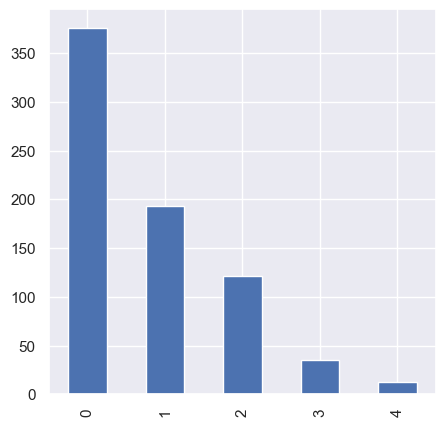

In [50]:
connections = [0, 5, 10, 20, 30, data_frame['connections'].max()]
discretize(data_frame, 'connections', connections)

0    253
1    227
2    133
3     69
4     43
5     13
Name: funding_rounds_bins, dtype: int64


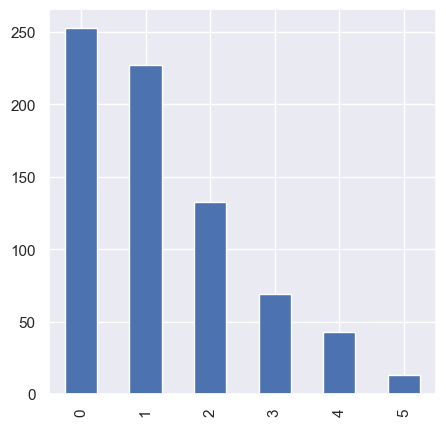

In [51]:
funding_rounds = [0, 1, 2, 3, 4, 6, data_frame['funding_rounds'].max()]
discretize(data_frame, 'funding_rounds', funding_rounds)

0    325
1    198
2    136
3     52
4     21
5      6
Name: milestones_bins, dtype: int64


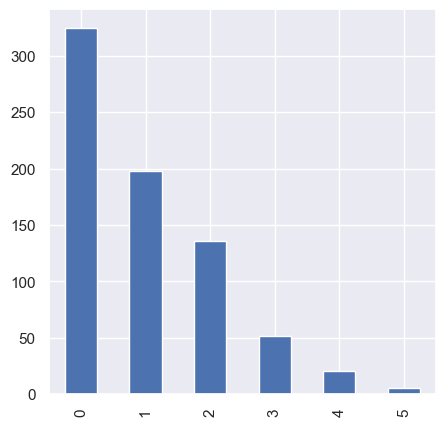

In [52]:
milestones = [0, 1, 2, 3, 4, 5, data_frame['milestones'].max()]
discretize(data_frame, 'milestones', milestones)

1    338
0    172
2    170
3     43
4     15
Name: avg_group_size_bins, dtype: int64


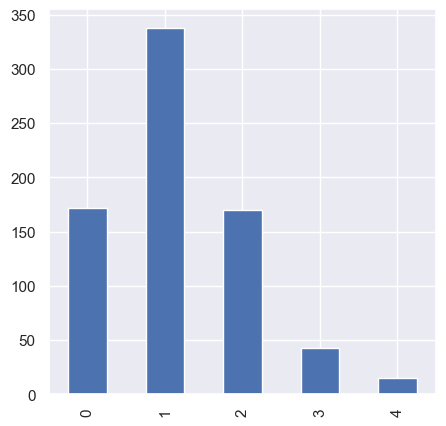

In [53]:
avg_group_size = [0, 1, 3, 5, 8, data_frame['avg_group_size'].max()]
discretize(data_frame, 'avg_group_size', avg_group_size)

We can also discretize the state_code column, because we saw that we have four significant states (CA, NY, MA, TX) and the rest of the states are not significant.   
We already did something similiar in the data cleaning part, by creating the country column, so now we only need to divide it to categories (0->4).

In [54]:
data_frame['state_code_bins'] = data_frame['country'].map({state: i for i, state in enumerate(data_frame['country'].unique())})
data_frame['state_code_bins'].value_counts()

0    376
2    171
3     85
1     72
4     34
Name: state_code_bins, dtype: int64

In [55]:
for col in COLUMNS_IS_CATEGORY:
    data_frame.loc[data_frame[col]==1, 'category_1'] = col.strip("is_")
data_frame['category_bins'] = data_frame['category_1'].map({state: i for i, state in enumerate(data_frame['category_1'].unique())})
data_frame['category_bins'].value_counts()

0    229
3    129
2    117
5     64
1     59
7     50
4     40
9     29
6     19
8      2
Name: category_bins, dtype: int64

#### Drop columns

In [56]:
data_frame.columns

Index(['id', 'state_code', 'latitude', 'longitude', 'zip_code', 'city', 'name',
       'foundation_date', 'first_funding_date', 'last_funding_date',
       'first_funding_age', 'last_funding_age', 'first_milestone_age',
       'last_milestone_age', 'connections', 'funding_rounds', 'total_funding',
       'milestones', 'in_CA', 'in_NY', 'in_MA', 'in_TX', 'in_otherstate',
       'category', 'is_software', 'is_web', 'is_mobile', 'is_enterprise',
       'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech',
       'is_consulting', 'is_othercategory', 'roundA', 'roundB', 'roundC',
       'roundD', 'avg_group_size', 'in_Top500', 'Target', 'state_code_codes',
       'category_codes', 'target_codes', 'city_codes', 'country',
       'in_Top500_str', 'connections_bins', 'funding_rounds_bins',
       'milestones_bins', 'avg_group_size_bins', 'state_code_bins',
       'category_1', 'category_bins'],
      dtype='object')

In [57]:
droppings = ['id', 'state_code', 'latitude', 'longitude', 'zip_code', 'city', 'name',
       'first_funding_date', 'last_funding_date', 'connections', 'funding_rounds', 
       'milestones', 'category', 'avg_group_size', 'avg_group_size', 'Target', 
       'state_code_codes', 'category_codes', 'city_codes', 
       'country', 'in_Top500_str', 'category_1'] + COLUMNS_IN_STATE + COLUMNS_IS_CATEGORY  # and nominal data-s
data_frame_clean = data_frame.drop(droppings, axis=1)
print("Columns after dropping")
data_frame_clean.columns

Columns after dropping


Index(['foundation_date', 'first_funding_age', 'last_funding_age',
       'first_milestone_age', 'last_milestone_age', 'total_funding', 'roundA',
       'roundB', 'roundC', 'roundD', 'in_Top500', 'target_codes',
       'connections_bins', 'funding_rounds_bins', 'milestones_bins',
       'avg_group_size_bins', 'state_code_bins', 'category_bins'],
      dtype='object')

In [58]:
data_frame_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   foundation_date      738 non-null    datetime64[ns]
 1   first_funding_age    738 non-null    float64       
 2   last_funding_age     738 non-null    float64       
 3   first_milestone_age  738 non-null    float64       
 4   last_milestone_age   738 non-null    float64       
 5   total_funding        738 non-null    int64         
 6   roundA               738 non-null    int64         
 7   roundB               738 non-null    int64         
 8   roundC               738 non-null    int64         
 9   roundD               738 non-null    int64         
 10  in_Top500            738 non-null    int64         
 11  target_codes         738 non-null    int64         
 12  connections_bins     738 non-null    category      
 13  funding_rounds_bins  738 non-null  

#### Normalization

First we need to fix the date columns, because they are not in the correct format - not a number

In [59]:
# transform the data columns to be numeric, so we can normalize them :)
data_frame_clean['foundation_date'] = data_frame_clean['foundation_date'].astype('int64')
# data_frame_clean['first_funding_date'] = data_frame_clean['first_funding_date'].astype('int64')
# data_frame_clean['last_funding_date'] = data_frame_clean['last_funding_date'].astype('int64')

data_frame_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   foundation_date      738 non-null    int64   
 1   first_funding_age    738 non-null    float64 
 2   last_funding_age     738 non-null    float64 
 3   first_milestone_age  738 non-null    float64 
 4   last_milestone_age   738 non-null    float64 
 5   total_funding        738 non-null    int64   
 6   roundA               738 non-null    int64   
 7   roundB               738 non-null    int64   
 8   roundC               738 non-null    int64   
 9   roundD               738 non-null    int64   
 10  in_Top500            738 non-null    int64   
 11  target_codes         738 non-null    int64   
 12  connections_bins     738 non-null    category
 13  funding_rounds_bins  738 non-null    category
 14  milestones_bins      738 non-null    category
 15  avg_group_size_bins  73

In [60]:
def normalize(data_f: pd.DataFrame, col_name: str) -> None:
    min_max_scaler = MinMaxScaler()  # min-max scaler normalizer between 0 and 1 :)
    min_max_scaler.fit(pd.DataFrame(data_f[col_name]))
    data_f[col_name] = min_max_scaler.transform(pd.DataFrame(data_f[col_name]))

for col in data_frame_clean.columns:  # normalize all the columns that are not binary and not bins
    if data_frame_clean[col].nunique() > 2 and "_bins" not in col:  # check if not-binary and not bins
        normalize(data_frame_clean, col)

In [61]:
data_frame_clean.head()

,foundation_date,first_funding_age,last_funding_age,first_milestone_age,last_milestone_age,total_funding,roundA,roundB,roundC,roundD,in_Top500,target_codes,connections_bins,funding_rounds_bins,milestones_bins,avg_group_size_bins,state_code_bins,category_bins
0,0.785287,0.365061,0.389409,0.484841,0.370577,0.000064,0,0,0,0,0,1,0,2,2,0,0,0
1,0.546270,0.458030,0.615461,0.544988,0.381127,0.007033,0,1,1,1,1,1,1,3,0,2,0,1
2,0.860722,0.325749,0.325749,0.402200,0.213102,0.000454,1,0,0,0,1,1,0,0,1,2,0,2
3,0.614601,0.393572,0.464142,0.519179,0.346024,0.007015,0,1,1,1,1,1,0,2,0,2,0,3
4,0.907553,0.292368,0.346291,0.365677,0.137242,0.000226,0,0,0,0,1,0,0,1,0,0,0,4


In [62]:
data_frame_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   foundation_date      738 non-null    float64 
 1   first_funding_age    738 non-null    float64 
 2   last_funding_age     738 non-null    float64 
 3   first_milestone_age  738 non-null    float64 
 4   last_milestone_age   738 non-null    float64 
 5   total_funding        738 non-null    float64 
 6   roundA               738 non-null    int64   
 7   roundB               738 non-null    int64   
 8   roundC               738 non-null    int64   
 9   roundD               738 non-null    int64   
 10  in_Top500            738 non-null    int64   
 11  target_codes         738 non-null    int64   
 12  connections_bins     738 non-null    category
 13  funding_rounds_bins  738 non-null    category
 14  milestones_bins      738 non-null    category
 15  avg_group_size_bins  73

#### Now for the **PCA**!!! :O

In [63]:
pca = PCA(n_components=0.999, svd_solver='full') 
pca.fit(data_frame_clean)
data_frame_pca = pd.DataFrame(pca.transform(data_frame_clean))
data_frame_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-2.500995,0.455763,-0.877848,0.199561,-1.647298,-1.132815,0.634246,-0.132844,-0.770336,-0.338351,0.471476,-0.148817,0.138058
1,-1.534972,1.322361,-1.137091,-1.989643,0.543556,0.327343,0.498597,-0.612188,0.058012,0.137452,0.212654,0.472105,-0.003125
2,-0.614862,-0.815238,-1.257651,0.717851,0.939961,-0.642591,-0.650141,0.114579,-0.398657,0.268575,0.001563,-0.034404,-0.118332
3,0.428684,0.164230,-1.285808,-1.602220,0.752390,-0.332802,0.292045,-0.835612,0.169040,0.310185,0.272037,0.563123,-0.173005
4,1.426360,-1.323271,-1.258717,-0.506455,-1.037185,0.021508,0.373882,0.175432,0.005214,-0.085454,-0.615066,-0.093083,-0.227976


In [64]:
pca.explained_variance_ratio_

array([0.45495522, 0.18106495, 0.11511722, 0.08294349, 0.06089492,
       0.03853926, 0.01655178, 0.01411812, 0.01215797, 0.00864716,
       0.0071351 , 0.00501711, 0.0022488 ])

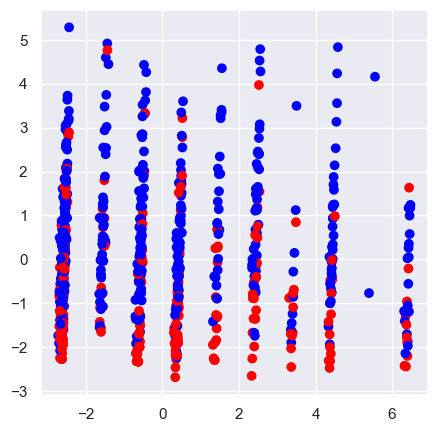

In [65]:
colordict = {0: 'red', 1: 'blue'}
plt.scatter(data_frame_pca[0], data_frame_pca[1], c=data_frame_clean['target_codes'].map(colordict))
plt.show()

### Saving the data after PCA

In [66]:
data_frame_pca.to_csv("data_frame_pca.csv", index=False)